In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/IMDB-Movie-Data.csv")

In [ ]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
print(f"rows : {df.shape[0]}")
print(f"columns : {df.shape[1]}")

rows : 1000
columns : 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
df.isnull().sum()


,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


DATA CLEANING


In [ ]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [ ]:
columns_to_drop = ['Rank', 'Title', 'Description', 'Actors']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(f"Updated columns in DataFrame: {df.columns.tolist()}")

Updated columns in DataFrame: ['Genre', 'Director', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore']


In [ ]:
df["Rating"] = np.where(df["Rating"] >= 7, 1, 0)

In [ ]:
df.head()

,Genre,Director,Year,Runtime,Rating,Votes,Revenue,Metascore
0,"Action,Adventure,Sci-Fi",James Gunn,2014,121,1,757074,333.13,76.0
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,1,485820,126.46,65.0
2,"Horror,Thriller",M. Night Shyamalan,2016,117,1,157606,138.12,62.0
3,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,1,60545,270.32,59.0
4,"Action,Adventure,Fantasy",David Ayer,2016,123,0,393727,325.02,40.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = ['Genre', 'Director']
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]
encoded_features = ohe.fit_transform(df[existing_categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(existing_categorical_cols), index=df.index)
df = pd.concat([df.drop(columns=existing_categorical_cols), encoded_df], axis=1)

In [ ]:
encoded_df

,Genre_Action,"Genre_Action,Adventure","Genre_Action,Adventure,Biography","Genre_Action,Adventure,Comedy","Genre_Action,Adventure,Crime","Genre_Action,Adventure,Drama","Genre_Action,Adventure,Family","Genre_Action,Adventure,Fantasy","Genre_Action,Adventure,Horror","Genre_Action,Adventure,Mystery",...,Director_Wes Craven,Director_Whit Stillman,Director_Will Gluck,Director_William Brent Bell,Director_Woody Allen,Director_Xavier Dolan,Director_Yimou Zhang,Director_Yorgos Lanthimos,Director_Zack Snyder,Director_Zackary Adler
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


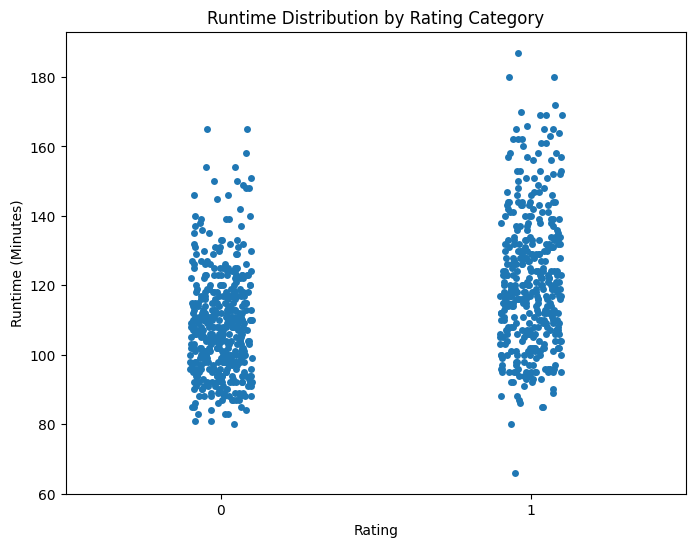

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Rating', y='Runtime', data=df, jitter=True)
plt.xlabel('Rating')
plt.ylabel('Runtime (Minutes)')
plt.title('Runtime Distribution by Rating Category')
plt.show()


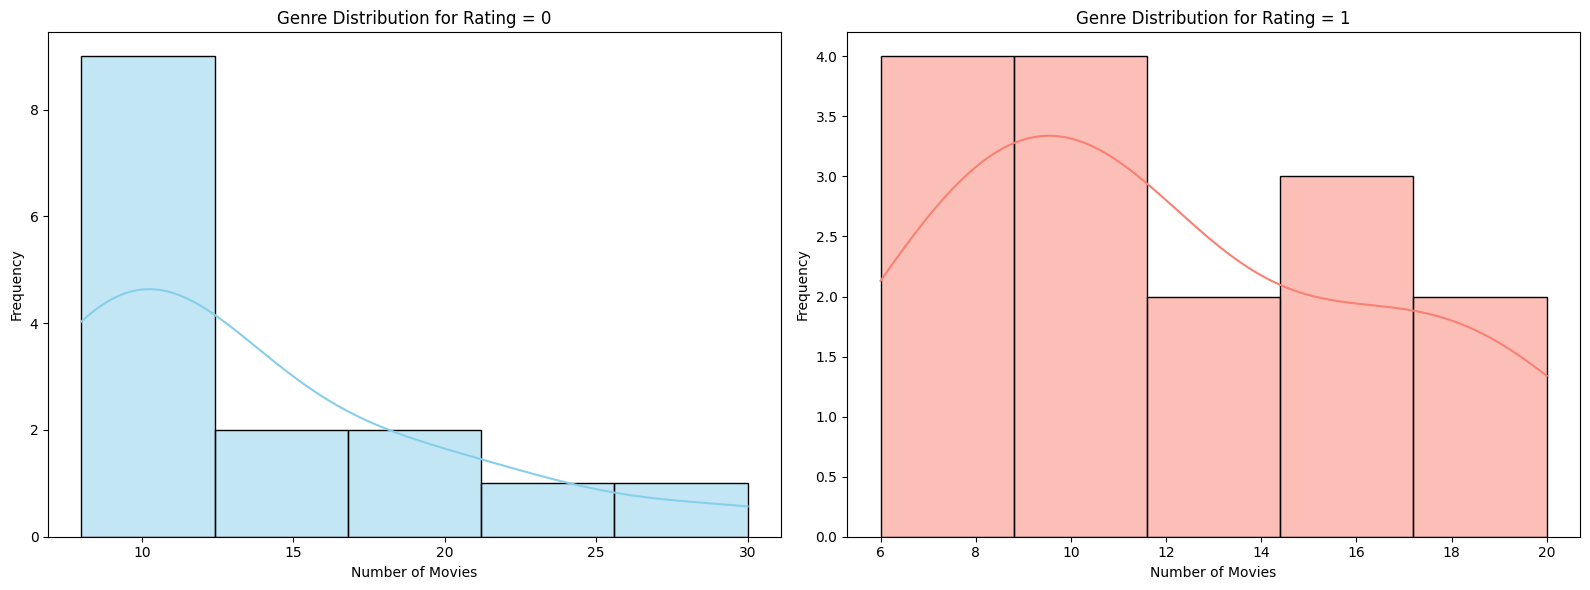

In [ ]:
genre_cols = [col for col in df.columns if col.startswith('Genre_')]

df_rating_0 = df[df['Rating'] == 0]
genre_counts_0 = df_rating_0[genre_cols].sum().sort_values(ascending=False).head(15)

df_rating_1 = df[df['Rating'] == 1]
genre_counts_1 = df_rating_1[genre_cols].sum().sort_values(ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(genre_counts_0.values, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Genre Distribution for Rating = 0')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Frequency')

sns.histplot(genre_counts_1.values, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Genre Distribution for Rating = 1')
axes[1].set_xlabel('Number of Movies')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


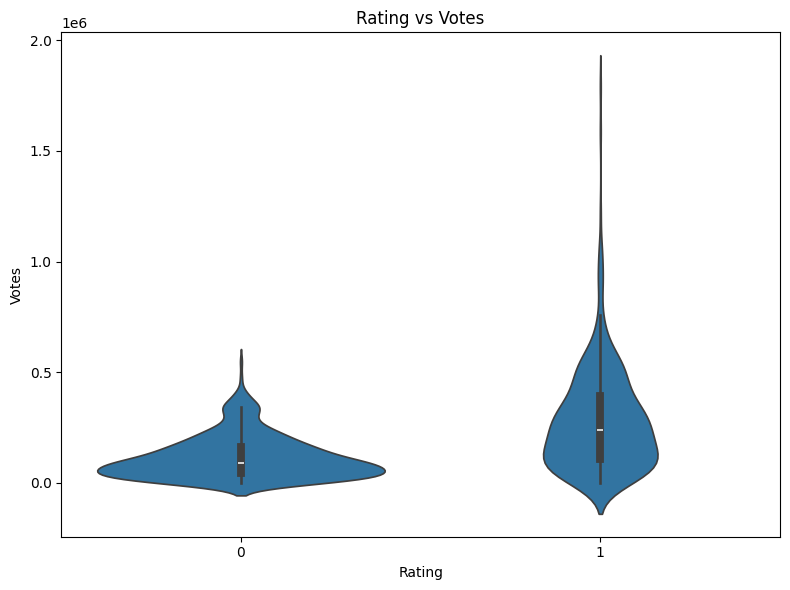

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x=df['Rating'], y=df['Votes'])
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs Votes')
plt.tight_layout()
plt.show()


In [ ]:
X = df.drop('Rating', axis=1)
y = df['Rating']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (838, 718)
Shape of y: (838,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (670, 718)
X_test shape: (168, 718)
y_train shape: (670,)
y_test shape: (168,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7917
